# NYC Taxi Data

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)

plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np
import math
import itertools

pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv("data/green_tripdata_2018-06.csv")

In [3]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-06-01 00:33:55,2018-06-01 00:36:13,N,1,66,33,5,0.51,4.0,0.5,0.5,0.70,0.0,NaN,0.3,6.00,1,1
1,2,2018-06-01 00:40:36,2018-06-01 00:49:46,N,1,25,49,5,1.97,9.0,0.5,0.5,2.06,0.0,NaN,0.3,12.36,1,1
2,2,2018-06-01 00:57:12,2018-06-01 01:02:58,N,1,61,49,5,1.40,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1
3,2,2018-06-01 00:10:13,2018-06-01 00:16:27,N,1,49,97,1,1.36,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2,1
4,1,2018-06-01 00:32:08,2018-06-01 00:52:06,N,1,75,127,1,7.90,24.0,0.5,0.5,6.30,0.0,NaN,0.3,31.60,1,1


# Number of Pickups per Day

In [28]:
data['timestamp'] = pd.to_datetime(data['lpep_pickup_datetime'])
data['date'] = data['timestamp'].dt.floor("D")

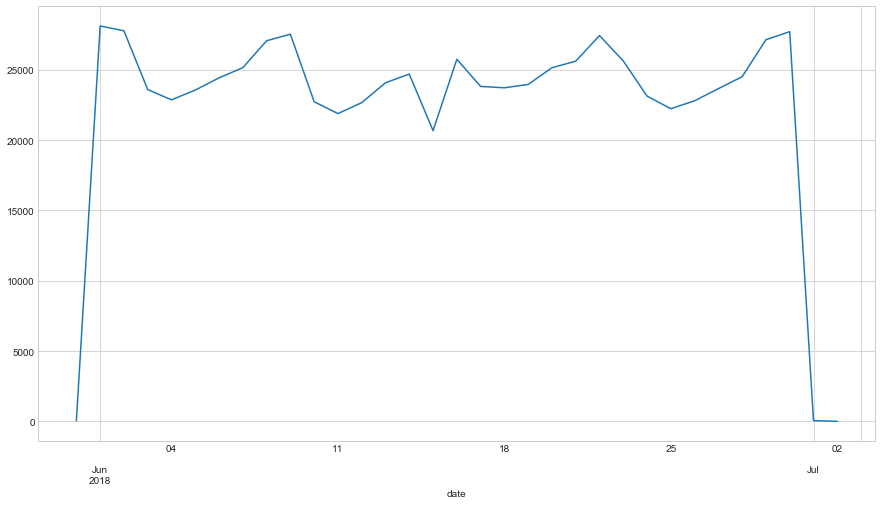

In [29]:
data.groupby('date').size()['2018-1-1':'2018-10-1'].plot();

# Number of Pickups by Day of the Week

In [49]:
counts = data['timestamp'].dt.dayofweek.value_counts().sort_index()

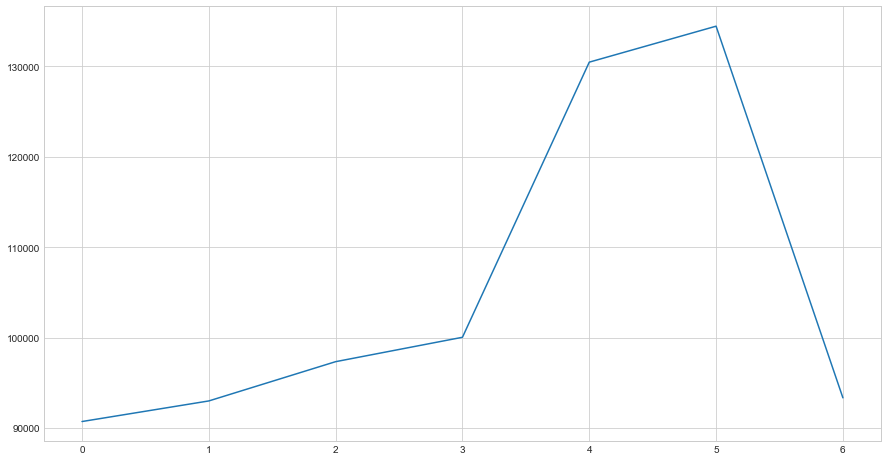

In [51]:
counts.plot();

# Number of Pickups by Hour

In [44]:
counts = data['timestamp'].dt.hour.value_counts().sort_index()

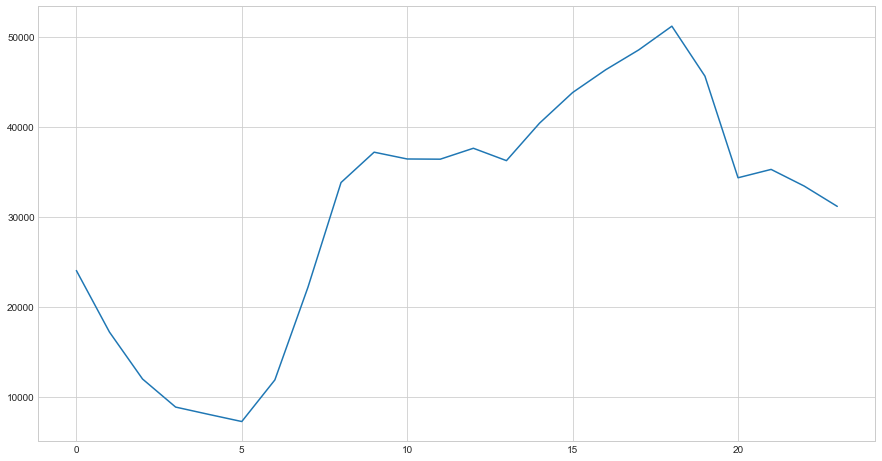

In [46]:
counts.plot();

# Payment Types

In [64]:
# 1= Credit card
# 2= Cash
# 3= No charge
# 4= Dispute
# 5= Unknown
# 6= Voided trip
index = [
    'Credit card',
    'Cash',
    'No charge',
    'Dispute',
    'Unknown'
]
pay_type = data['payment_type'].value_counts().sort_index()
pay_type.index = index
pay_type

Credit card    417076
Cash           316932
No charge        3542
Dispute          1794
Unknown            29
Name: payment_type, dtype: int64

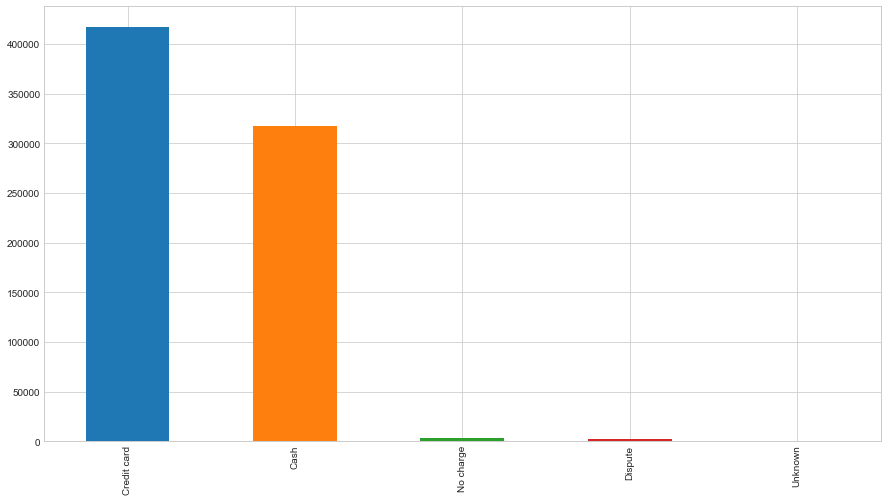

In [65]:
pay_type.plot.bar();

# Number of Passengers

In [69]:
pass_counts = data['passenger_count'].value_counts().sort_index()
pass_counts

0      1572
1    624003
2     57232
3     13007
4      4961
5     24985
6     13587
7        11
8        13
9         2
Name: passenger_count, dtype: int64

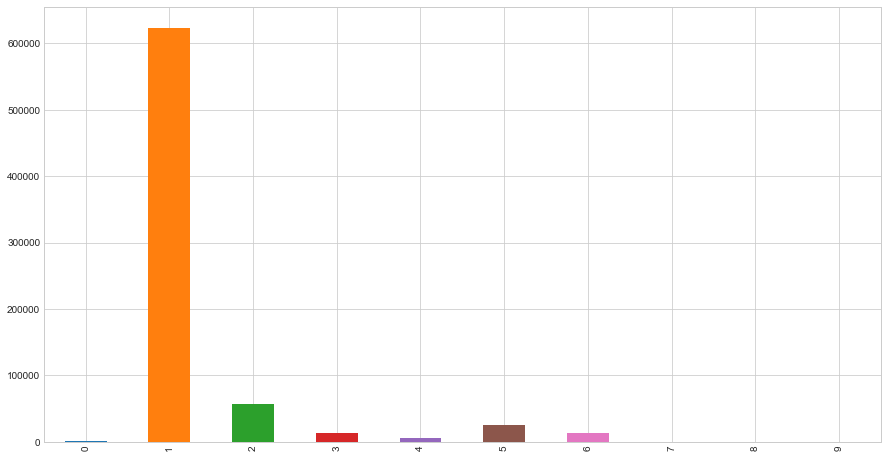

In [70]:
pass_counts.plot.bar();